# Exercises for Bernstein's lectures on weak gravitational lenses

These notebooks will make use of the `astropy` package, which you can install through `conda` or `pip`.  There will also be some catalog and image files for you to read.

First we'll load our packages and see how to use the astropy cosmology, constants, and units classes.

In [1]:
import numpy as np
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import astropy.constants as const
from astropy.table import Table
from scipy.spatial import KDTree

In [2]:
# First we'll load our packages and see how to use the astropy cosmology, constants, and units classes.

#What's the current Hubble constant in units of s^-1?
cosmo.H(0).to(1/u.second)

<Quantity 2.19271127e-18 1 / s>

## Problem 1:

(a) What's the gravitational deflection angle of a photon grazing the limb of the sun, in arcsec?

(b) How far away from the Sun would you need to be in order to see it surrounded by an Einstein ring image of a distant star? Would this viewpoint be within our Solar System? (In this case, "distant" means $D_{LS}/D_{OS}\rightarrow 1$).

In [3]:
# Q1a: Use astropy to apply our deflection formula to a solar mass lens with impact parameter 
# of the solar radius.
# 4GM / bc^2
deflect = 4 * const.G * const.M_sun / (const.R_sun * const.c**2)

print((deflect*u.radian).to(u.arcsec))


1.7511903255599846 arcsec


In [4]:
# Q1b: 

## Problem 2:
What is the critical surface density $\Sigma_{\rm crit}$ for a gravitational lens at redshift $z_L=0.5$ deflection light from a source at $z_s=1.0$?  Give in units of g cm^{-2} and of $M_\odot / \textrm{pc}^2$.

## Problem 3

(a) Calculate the deflection angle (in arcsec) of a singular isothermal sphere with the rotation velocity $v_{\rm circ}=220$ km/s like the Milky way.

(b) And again, for a giant cluster of galaxies with velocity disperson $\sigma=1400$ km/s.

## Problem 4:

Show algebraically that SIS and point mass Einstein rings of same radius enclose the same mass and both have $\Sigma_{\rm crit}$ surface density interior to the ring.

## Problem 5

Make a graph of the tangential shear $\gamma_t$ vs angular radius $\theta$ from the center of an SIS galaxy cluster at $z_L=0.5$ with $\sigma=1200$ km/s, for sources at $z_s=0.9.$  Make a log-log graph with the x axis going from 2 to 200 times the Einstein radius (weak lensing formulae aren't too useful at the scale of the Einstein radius!).



## Problem 6

The file `clusterlens.fits` contains a FITS-format table of observed source galaxy positions and ellipticities relative to a cluster of galaxies centered at (0,0).  The columns of the table are X, Y, E1, E2.  Each ellipticity component has a noise (shape noise plus measurement noise) of 0.1.  We can assume that the sources are at $z_s=0.9$ and the lens at $z_l=0.3$.

(a) Read the table and calculate the mean tangential shear $\langle \gamma_t \rangle$ in 10 bins logarithmically spaced between  100 and 5000 arcsec, then plot them (with error bars) on a log-log plot.  Remember that you're going to need to rotate each source's shear in order to get its tangent component from its (e1,e2).

(b) Also plot the B-mode signal in the same bins by getting the mean $\gamma_\times,$ the component 45 degrees away from tangential.  A semilog plot is best for this.

(c) Estimate the velocity dispersion of the cluster, fitting either by eye to the plot or using chi-squared minimization.

[**`matplotlib` hints:** Use `pl.errorbar()` to make a plot with error bars. To make the x axis logarithmic, enter `pl.xscale('log')` and likewise for y axis.]



0.014556892195883735 -0.06529831765394306 274.19678164167993 310.3306578997113


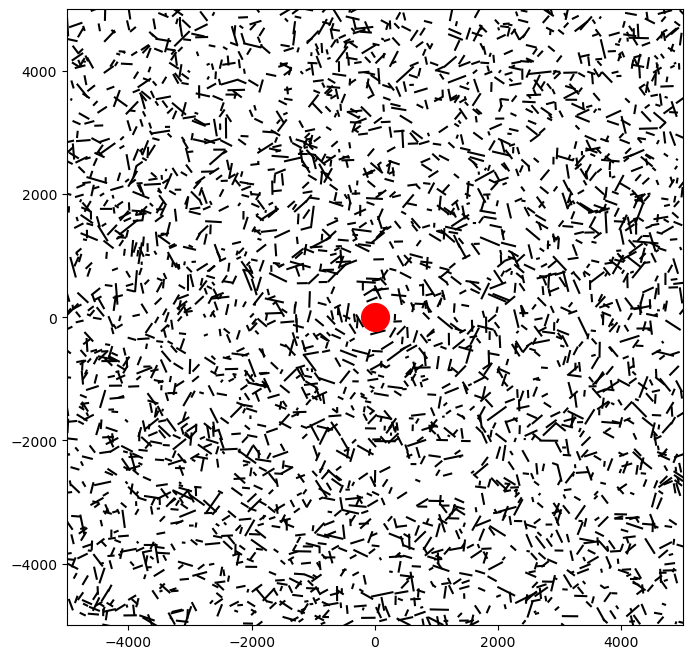

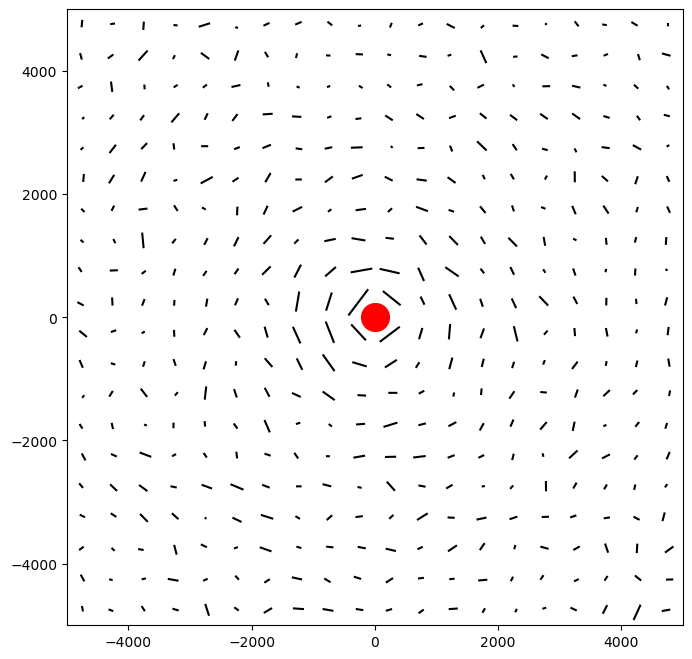

In [5]:
# Let's note some important values from the problem
shapeNoise = 0.1 
z_s = 0.9
z_l = 0.3
dOS = cosmo.angular_diameter_distance(z_l)
dOL = cosmo.angular_diameter_distance(z_s)
dLS = cosmo.angular_diameter_distance_z1z2(z_l,z_s)

# Here's how to read the data, assuming that the input file is in
# the current data
tab = Table.read('shear_catalog.fits')
x = tab['x']
y = tab['y']
e1 = tab['e1']
e2 = tab['e2']

# For our own edification, let's draw a "whisker diagram"
# of the shear pattern

# We want to draw each whisker with a length proportional
# to the total e
eScale = 1000  # How many x/y units does e=1 span?
whLength = np.hypot(e1,e2) * eScale
# Get the position angle of e
pa = np.arctan2(e2,e1) / 2.

# Ends of line segment are symmetric about position (x,y)
x0 = x - whLength * np.cos(pa) / 2.
x1 = x + whLength * np.cos(pa) / 2.
y0 = y - whLength * np.sin(pa) / 2.
y1 = y + whLength * np.sin(pa) / 2.

# We'll just plot every 10th one
pl.figure(figsize=(8,8))
for i in range(0,len(x0),10):
    # Plot a little line segment
    pl.plot((x0[i],x1[i]), (y0[i],y1[i]), 'k-')
#Mark the cluster center
pl.plot(0.,0.,'ro',ms=20)
pl.xlim(-5000,5000)
pl.ylim(-5000,5000)
pl.gca().set_aspect('equal')

# Now let's try it again, binning the galaxies into 500x500" regions
pl.figure(figsize=(8,8))
eScale = 5000  # How many x/y units does e=1 span?
boxsize = 500
boxMin = np.arange(-5000,5000,boxsize)
for xMin in boxMin:
    usex = np.logical_and(x>xMin, x<=xMin+boxsize)
    for yMin in boxMin:
        usey = np.logical_and(y>yMin, y<=yMin+boxsize)
        use = np.logical_and(usex, usey)
        e1mean = np.mean(e1[use])
        e2mean = np.mean(e2[use])
        xx = np.mean(x[use])
        yy = np.mean(y[use])
        if xMin==0 and yMin==0:
            print(e1mean,e2mean,xx,yy) ####
        whLength = np.hypot(e1mean,e2mean) * eScale
        # Get the position angle of e
        pa = np.arctan2(e2mean,e1mean) / 2.

        # Ends of line segment are symmetric about position (x,y)
        x0 = xx - whLength * np.cos(pa) / 2.
        x1 = xx + whLength * np.cos(pa) / 2.
        y0 = yy - whLength * np.sin(pa) / 2.
        y1 = yy + whLength * np.sin(pa) / 2.
        pl.plot((x0,x1), (y0,y1), 'k-')
#Mark the cluster center
pl.plot(0.,0.,'ro',ms=20)
pl.xlim(-5000,5000)
pl.ylim(-5000,5000)
pl.gca().set_aspect('equal')



## Problem 7 

The image in the file `gg_lensing.fits` contains 3 kinds of objects: background (source) galaxies that we'll assume are at $z_S=0.9$; "lens" galaxies at $z_L=0.3$, and some foreground stars.  Your task is to use weak lensing to figure out the typical velocity dispersion of the lens galaxies - we'll assume they are SIS mass distributions.

Each pixel in the image spans 0.5 arcsec of sky.  I have placed a shape noise $\sigma_e=0.2$ on each galaxy.

a) The first task is to measure the second moments of each source from the image.  To speed up this task, there is a list of all the source's locations embedded in that file, and some code below that will measure 2nd moments.

b) Then you need to determine which are the stars, lenses, and sources.  If you make a histogram of the 2nd-moment size $(M_xx + M_yy) / flux$, there will be three groups.  The smallest are the stars and the largest are the lens galaxies.

c) Use the moments of the stars to remove the PSF effects from the moments of the source galaxies, to form an estimated $e_1$ and $e_2$ for each source.

d) Next, form all pairs of one lens and one source galaxy.  Turn the $e_1$ and $e_2$ of the source into the $e_t$ and $e_x$ components relative to the lens.  

e) Divide the lens-source pairs into six bins of separation $\theta$ between 20 and 400 arcsec, and get the estimated $\gamma_t$ from the $\langle e_t \rangle$ in the bin.  Just like in Problem 6.  Plot your results.  Include the uncertainties from shape noise.

f) And as in Problem 6, use your $\gamma_t$ vs $\theta$ plot to estimate $\sigma$ of the lenses.  You can assume that all of the lens galaxies have the same $\sigma.$  This is called "stacking" the signal.

g) Revel in your accomplishment, you have just made a basic galaxy-galaxy weak lensing shear measurement!


In [6]:
# Set up some numbers that we'll need.
pixelScale = 0.5  # Arcsec per pixel
shapeNoise = 0.2  # Noise in e per component

z_s = 0.9
z_l = 0.3
dOS = cosmo.angular_diameter_distance(z_l)
dOL = cosmo.angular_diameter_distance(z_s)
dLS = cosmo.angular_diameter_distance_z1z2(z_l,z_s)


(0.0, 1024.0)

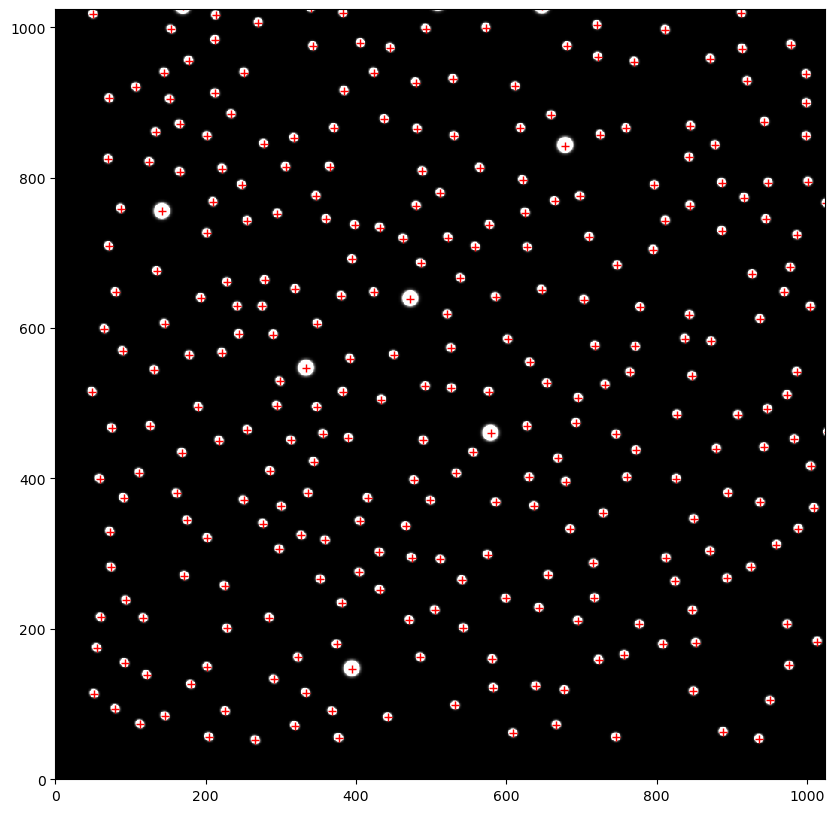

In [7]:
# Start part (a) by retrieving the data and the source catalog.
# Then we'll plot the image and the catalog locations
img = pf.getdata('ggl_image.fits')
tab = Table.read('ggl_catalog.fits')

# Plot a portion of the image
pl.figure(figsize=(10,10))
pl.imshow(img[0:1024,0:1024], interpolation='nearest',cmap='gray',vmax=0.1)

# Also draw a + sign on every source in the catalog
pl.plot(tab['x'],tab['y'],'r+')
pl.ylim(0,1024)
pl.xlim(0,1024)

In [8]:
# Here's the function for measuring moments from a pixelized image.  You might wish to
# want to understand what's being done here at some point.

def getMoments(img, xy, radius=20, pixelScale=pixelScale):
    '''A function that will calculate the flux and flux-normalized second
    moments in a region centered on the `xy` coordinates of the `img` array,
    using only pixels that are within `radius` of the center.
    
    Note that xy array is in the order [x,y] but the image itself has indices 
    in the order [iy,ix].
    
    Returns:
    flux, Mxx/flux, Mxy/flux, Myy/flux '''
    
    # Cut a piece out of the image with lower-left corner at xyOffset
    _,xyOffset = np.modf(xy-radius)
    xyOffset = np.array(xyOffset, dtype=int)  # Convert to integer
    
    boxsize = 2*radius + 1
    data = img[xyOffset[1]:xyOffset[1]+boxsize, xyOffset[0]:xyOffset[0]+boxsize]
    
    # Build two arrays holding each pixel's x and y distances from the xy coordinate
    tmp = np.arange(boxsize)
    dx, dy = np.meshgrid(tmp,tmp)
    dx = dx - (xy[0]-xyOffset[0])
    dy = dy - (xy[1]-xyOffset[1])
    
    # Make a mask that's true (1) only inside our circle.
    rr = dx*dx + dy*dy  # Get radius^2
    mask = rr < radius*radius  # Use pixels within a circle

    # Now calculating the moments themselves is easy.
    flux = np.sum(data*mask)
    # Mx = np.sum(data*mask*dx) # First moments.  We're not actually using them though.
    # My = np.sum(data*mask*dy) # (See the comment below about recentering the galaxy.)
    Mxx = np.sum(data*mask*dx*dx)
    Mxy = np.sum(data*mask*dx*dy)
    Myy = np.sum(data*mask*dy*dy)
   
    # Notice that we assumed that we were given the exact object center on input.
    # More typically, in real life one would determine these by shifting xy
    # iteratively until Mx and My are zero.
    
    return flux, Mxx/flux, Mxy/flux, Myy/flux


In [9]:
# Part (b) - 

In [10]:
# Part (c) 


In [11]:
# Part (d): Now we're going to consider all pairs of sources with lenses.


In [12]:
# Part (e): bin the pairs into logarithmic theta ranges.


In [13]:
# Part (f) - we'll use our chisq minimizer and shearModel() function from Problem 6



## Challenge problem 

If you want to go a bit deeper after the lectures:

Try to make the same graph as in Problem 5 if we instead assume the cluster has a Navarro-Frenk-White (NFW) mass distribution that the N-body simulators tell us is a more likely form for the mean dark-matter profile, as described in Prof. van den Bosch's lectures.  You can assume that the cluster has a concentration parameter $c=7.$

Wright & Brainerd at https://iopscience.iop.org/article/10.1086/308744/pdf have done analytic integrals to give the 2d surface density $\Sigma(r)$ associated with the 3d NFW density profile.   They also give some (messy!) analytic formulae for the $\bar\Sigma(<r)$ function, but it might be to make use of the scipy numerical integrator to get this.

Then you can try fitting an NFW profile with concentration parameter $c=7$ to these $\gamma_t(\theta)$ data as in Problem 6, if you've done the NFW part of Problem 5.   What mass $M_{200}$ would this shear profile imply for the cluster? Can you tell whether the data are a better fit to the NFW or to the SIS model? [These data are made up.  The answer for this cluster is not a verdict on the real universe!]